# quant-econ Solutions: Optimal Savings

Solutions for http://quant-econ.net/jl/ifp.html

In [1]:
using QuantEcon, QuantEcon.Models
using PyPlot


## Exercise 1

Starting value function iteration
Starting policy function iteration


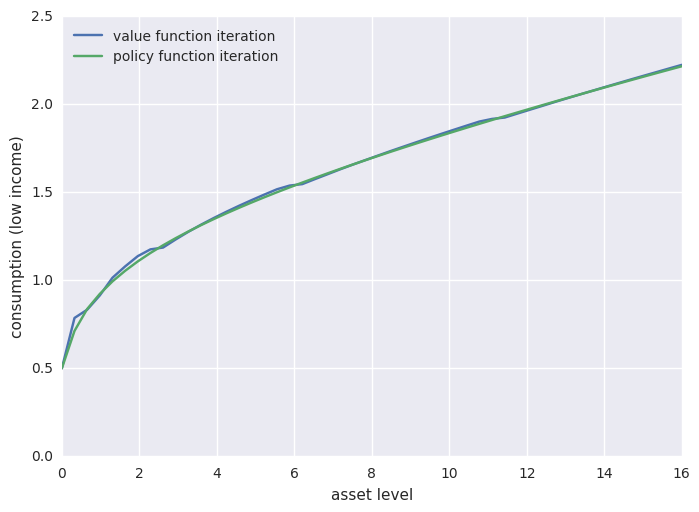

In [3]:
function ex1()
    cp = ConsumerProblem()
    K = 80

    V, c = init_values(cp)
    println("Starting value function iteration")
    for i=1:K
        V = bellman_operator(cp, V)  
    end
    c1 = bellman_operator(cp, V, ret_policy=true) 

    V2, c2 = init_values(cp)
    println("Starting policy function iteration")
    for i=1:K
        c2 = coleman_operator(cp, c2)  
    end

    fig, ax = subplots()
    ax[:plot](cp.asset_grid, c1[:, 1], label="value function iteration")
    ax[:plot](cp.asset_grid, c2[:, 1], label="policy function iteration")
    ax[:set_xlabel]("asset level")
    ax[:set_ylabel]("consumption (low income)")
    ax[:legend](loc="upper left")
    plt.show()
end

ex1()

## Exercise 2

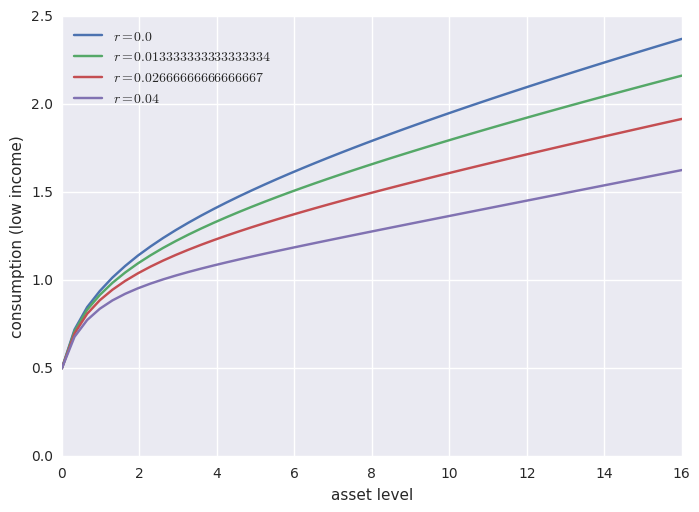

In [4]:
function ex2()
    r_vals = linspace(0, 0.04, 4)  
    fig, ax = subplots()
    
    for r_val in r_vals
        cp = ConsumerProblem(r=r_val)
        v_init, c_init = init_values(cp)
        c = compute_fixed_point(x -> coleman_operator(cp, x), c_init, 
                                max_iter=150, verbose=false)
        ax[:plot](cp.asset_grid, c[:, 1], label=LaTeXString("\$r = $r_val\$"))
    end

    ax[:set_xlabel]("asset level")
    ax[:set_ylabel]("consumption (low income)")
    ax[:legend](loc="upper left")
    plt.show()
end

ex2()

## Exercise 3

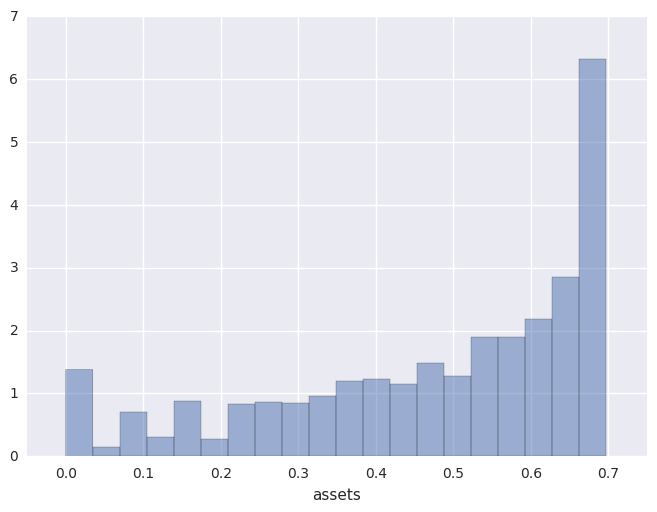

In [8]:
using Grid

function compute_asset_series(cp, T=500000; verbose=false)
    Pi, z_vals, R = cp.Pi, cp.z_vals, cp.R  # Simplify names
    v_init, c_init = init_values(cp)
    c = compute_fixed_point(x -> coleman_operator(cp, x), c_init, 
                            max_iter=150, verbose=false)
    cf(a, i_z) = CoordInterpGrid(cp.asset_grid, c[:, i_z], BCnearest,
                                 InterpLinear)[a]
    a = zeros(T+1)
    z_seq = mc_sample_path(MarkovChain(Pi), 1, T)
    for t=1:T
        i_z = z_seq[t]
        a[t+1] = R * a[t] + z_vals[i_z] - cf(a[t], i_z)
    end
    return a
end

function ex3()
    cp = ConsumerProblem(r=0.03, grid_max=4)
    a = compute_asset_series(cp)
    fig, ax = subplots()
    ax[:hist](a, bins=20, alpha=0.5, normed=true)
    ax[:set_xlabel]("assets")
    ax[:set_xlim](-0.05, 0.75)
    plt.show()
end

ex3()

## Exercise 4

Finished iteration b=1.0
Finished iteration b=3.0


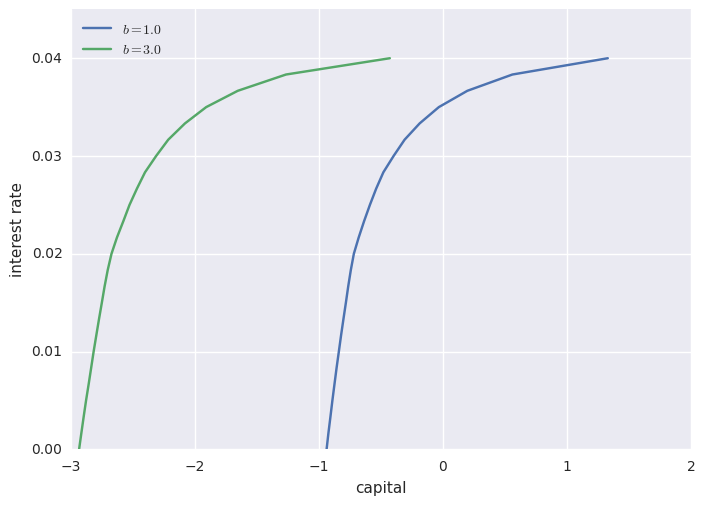

In [9]:
function ex4()
    M = 25
    r_vals = linspace(0, 0.04, M)  
    fig, ax = subplots()
    
    for b in [1.0, 3.0]
        asset_mean = Float64[]
        for r_val in r_vals
            cp = ConsumerProblem(r=r_val, b=b)
            the_mean = mean(compute_asset_series(cp, 250000))
            push!(asset_mean, the_mean)
        end
        ax[:plot](asset_mean, r_vals, label=LaTeXString("\$b= $b\$"))
        println("Finished iteration b=$b")
    end

    ax[:set_yticks](0:0.01:0.045)
    ax[:set_xticks](-3:1:2.0)
    ax[:set_xlabel]("capital")
    ax[:set_ylabel]("interest rate")
    ax[:grid](true)
    ax[:legend](loc="upper left")
    plt.show()
end

ex4()